In [2]:
import pandas as pd
import plotly 
import plotly.offline as py
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)

### Offline para que seja possivel plotar graficos sem a autentificação em nuvem

In [3]:
data = pd.read_csv("PETR4.SA.csv", sep = ',')

### Importando renderers para que o grafico apareça

In [6]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [7]:
pio.renderers.default = "jupyterlab"

In [8]:
import plotly.graph_objs as go

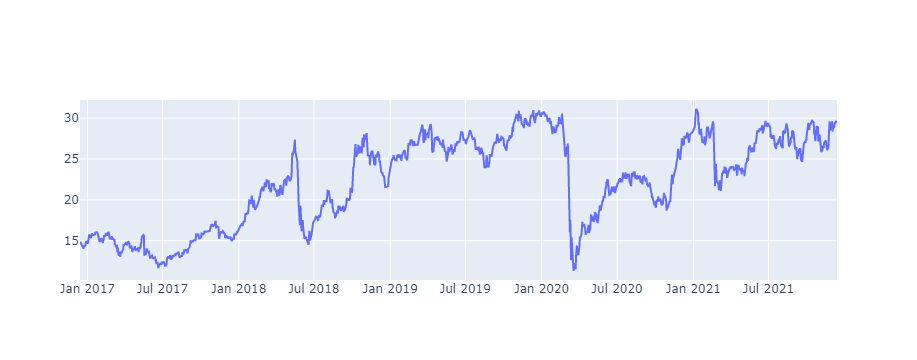

In [12]:
dataF = [go.Scatter( x = data.Date,  y=data['Close'])]
py.iplot(dataF)

### Plotando agora fragico de linhas porem customizado

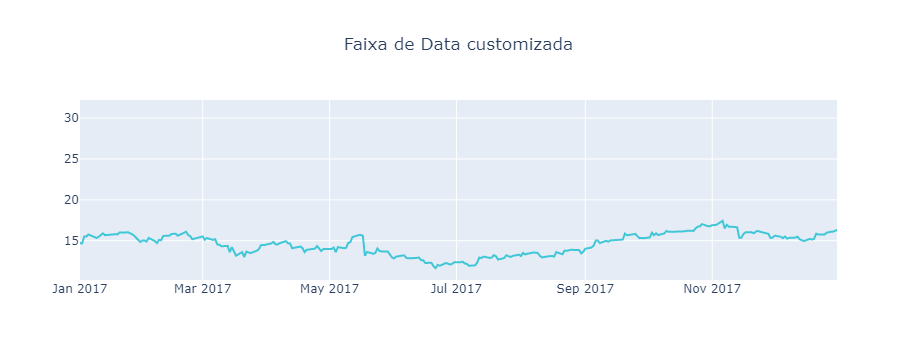

In [18]:
import plotly.graph_objs as go

newData = go.Scatter(
    x=data.Date,
    y= data['Close'],
    name = "Petr4 Close",
    line = dict(color = "#17BECF"),
    opacity = 0.8)
           
           
df = [newData]

layout = dict(
    title = "Faixa de Data customizada",
    title_x=0.5,
    xaxis = dict(range=['2017-01-01', '2017-12-31'])
)
           
fig = dict(data=df, layout=layout) 
py.iplot(fig, filename = "Manually Set Range")

### Grafico igual porem com animações de range slider

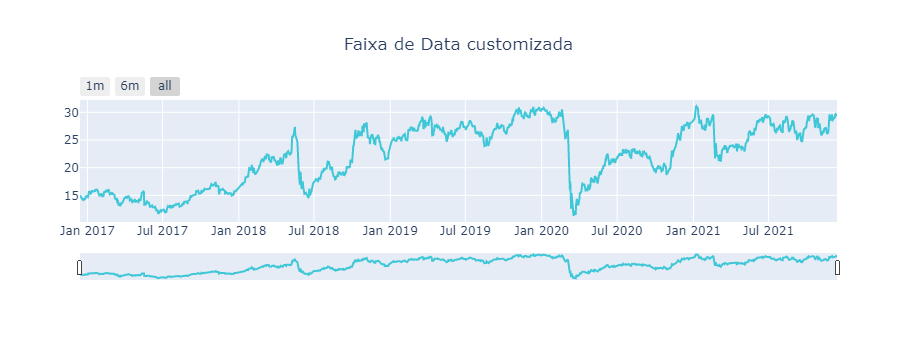

In [22]:
import plotly.graph_objs as go

newData = go.Scatter(
    x=data.Date,
    y= data['Close'],
    name = "Petr4 Close",
    line = dict(color = "#17BECF"),
    opacity = 0.8)
           
           
df = [newData]

layout = dict(
    title = "Faixa de Data customizada",
    title_x=0.5,
    xaxis = dict(
                rangeselector=dict(
                            buttons = list([
                                dict(count = 1,
                                    label='1m',
                                    step='month',
                                    stepmode='backward'),
                                dict(count = 6,
                                    label='6m',
                                    step='month',
                                    stepmode='backward'),
                                dict(step='all')
                            ])
                        ),
                rangeslider=dict(visible=True),type='date'
    )
)
           
fig = dict(data=df, layout=layout) 
py.iplot(fig)

#### grafico de vela conhecido como Candlesticks

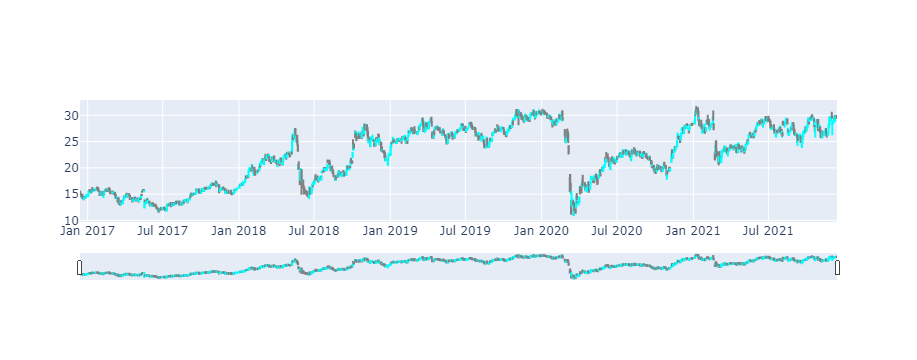

In [28]:
trace = go.Candlestick(x=data['Date'],
                       open=data['Open'],
                       high=data['High'],
                       low=data['Low'],
                       close=data['Close'],
                       increasing_line_color= 'cyan', decreasing_line_color= 'gray'
                      )
Candledata = [trace]
py.iplot(Candledata, filename='simple_candestick')

In [23]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-14,15.43,15.47,14.74,14.74,11.114389,44215700
1,2016-12-15,14.78,14.91,14.33,14.85,11.197334,43338800
2,2016-12-16,14.90,15.14,14.76,14.76,11.129472,37876200
3,2016-12-19,14.88,14.89,14.35,14.36,10.827859,39128600
4,2016-12-20,14.46,14.59,14.10,14.35,10.820319,31810000


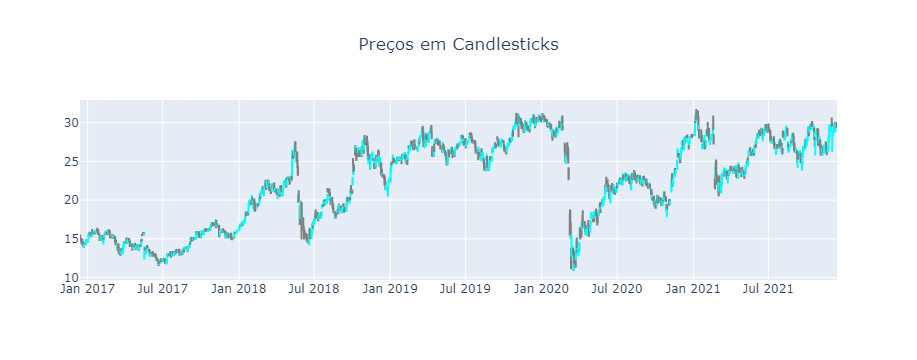

In [32]:
trace = go.Candlestick(x=data['Date'],
                       open=data['Open'],
                       high=data['High'],
                       low=data['Low'],
                       close=data['Close'],
                       increasing_line_color= 'cyan', decreasing_line_color= 'gray')

layout =  go.Layout(
                title = 'Preços em Candlesticks',
                title_x = 0.5,
                xaxis = dict(
                    rangeslider = dict(
                        visible = False)
                )
)

candledata = [trace]
fig = go.Figure(data=Candledata, layout=layout)
py.iplot(fig)